In [34]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [35]:

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

df = pd.read_csv(URL)


## **TASK 1.1**

Line chart to show how automobile sales fluctuate from year to year

Text(0, 0.5, 'Number of Automobiles')

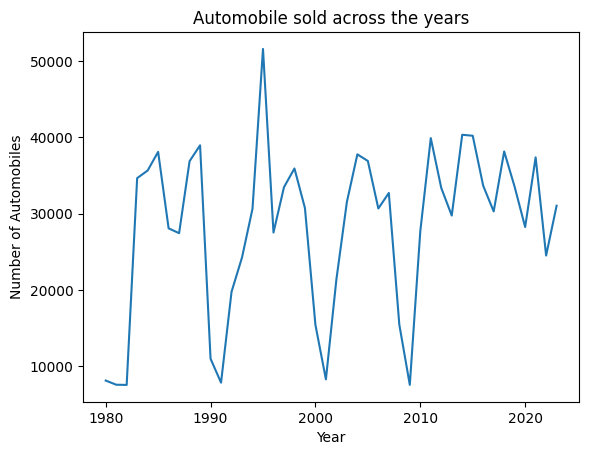

In [36]:
temp = df.groupby("Year")["Automobile_Sales"].sum()
temp.plot(x="Year", y="Automobile_Sales", kind="line")
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")

## **TASK 1.2**

Plot different lines for categories of vehicle type and analyse the trend.

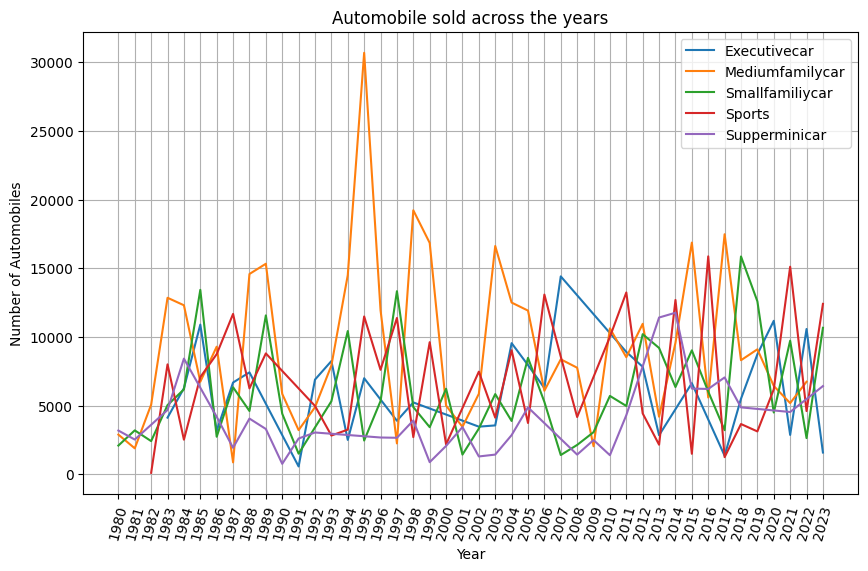

In [37]:
plt.figure(figsize=(10, 6))
temp = df.groupby(["Year", "Vehicle_Type"])[["Automobile_Sales"]].sum().reset_index()
temp.set_index("Year", inplace=True)
temp = temp.groupby(["Vehicle_Type"])["Automobile_Sales"]
temp.plot(kind="line")
plt.xticks(list(range(df.Year.unique().min(), df.Year.unique().max()+1)), rotation=75)
plt.grid()
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")
plt.legend()

## **TASK 1.3**

a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

Text(0.5, 1.0, 'Average Automobile Sales during Recession and Non-Recession')

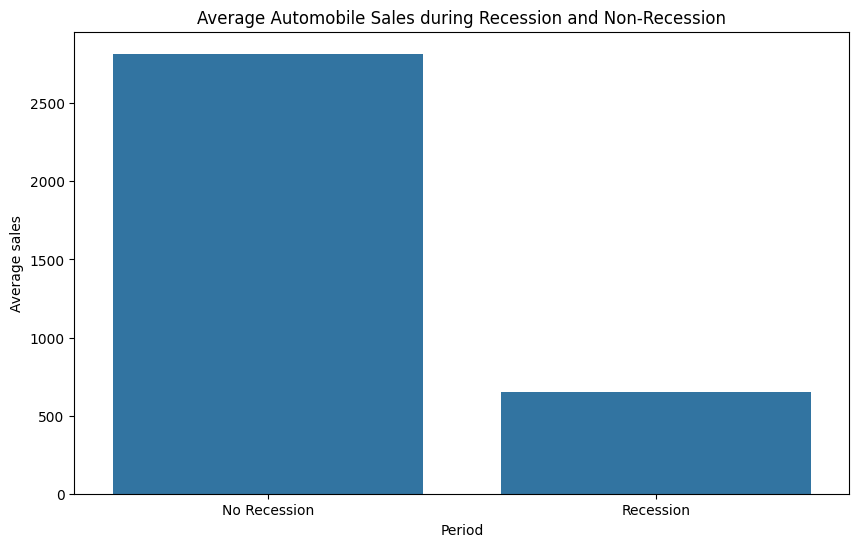

In [38]:
temp=df.groupby(["Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0:"No Recession", 1:"Recession"})
# temp
plt.figure(figsize=(10, 6))
sns.barplot(data=temp, x="Recession", y="Automobile_Sales")
plt.xlabel('Period')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')



Text(0.5, 1.0, 'Average Automobile Sales per Vehicle Type during Recession and Non-Recession')

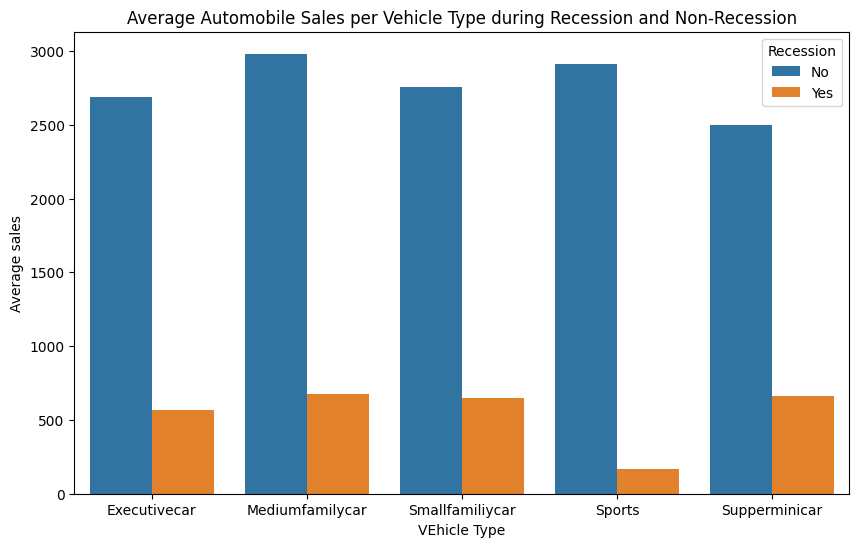

In [39]:
temp=df.groupby(["Vehicle_Type", "Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0:"No", 1:"Yes"})
plt.figure(figsize=(10, 6))
sns.barplot(data=temp, x="Vehicle_Type", y="Automobile_Sales", hue="Recession")
plt.xlabel('VEhicle Type')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales per Vehicle Type during Recession and Non-Recession')


## **TASK 1.4**

compare the variations in GDP during recession and non-recession period

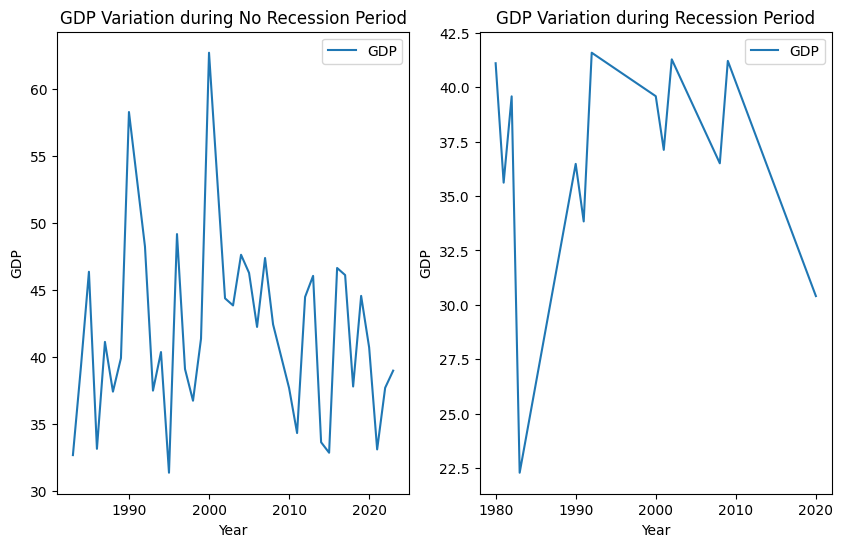

In [40]:
temp = df.groupby(["Recession","Year"])["GDP"].mean().reset_index()
no = temp[temp["Recession"] == 0]
yes = temp[temp["Recession"] == 1]
fig = plt.figure(figsize=(10, 6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
no.plot(x="Year", y="GDP", kind="line", ax=ax0)
ax0.set_title('GDP Variation during No Recession Period')
ax0.set_ylabel('GDP')
yes.plot(x="Year", y="GDP", kind="line", ax=ax1)
ax1.set_title('GDP Variation during Recession Period')
ax1.set_ylabel('GDP')
plt.show()

## **TASK 1.5**

displaying the impact of seasonality on Automobile Sales.

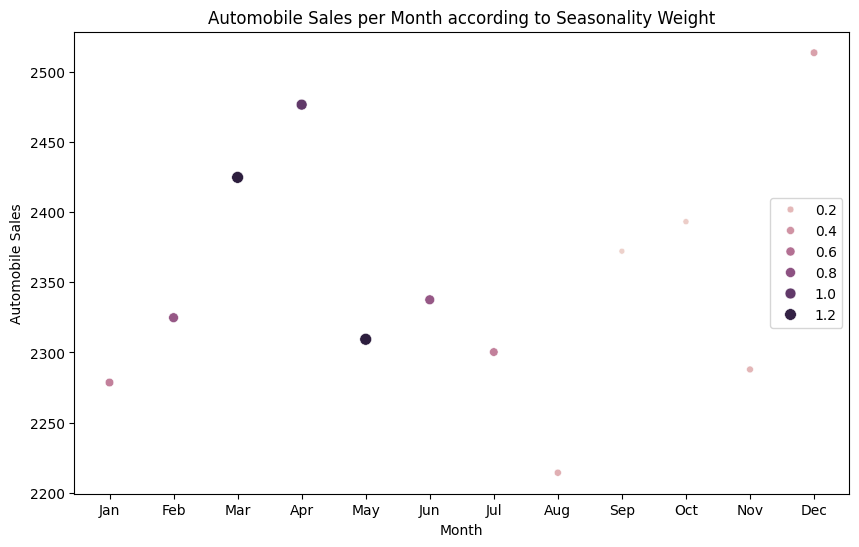

In [41]:
temp = df.copy()
months=temp["Month"].unique().tolist()

temp["Month"] = temp["Month"].replace(dict(zip(months, range(0,len(months)))))
temp = temp.groupby("Month")[["Automobile_Sales", "Seasonality_Weight"]].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.xticks(ticks=range(0,len(months)),labels=months)
sns.scatterplot(data=temp,
                x='Month',
                y='Automobile_Sales',
                hue="Seasonality_Weight",
                size="Seasonality_Weight",

               )
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.title("Automobile Sales per Month according to Seasonality Weight")
plt.legend(loc="right")

## **TASK 1.6**

identify the correlation between average vehicle price relate to the sales volume during recessions.

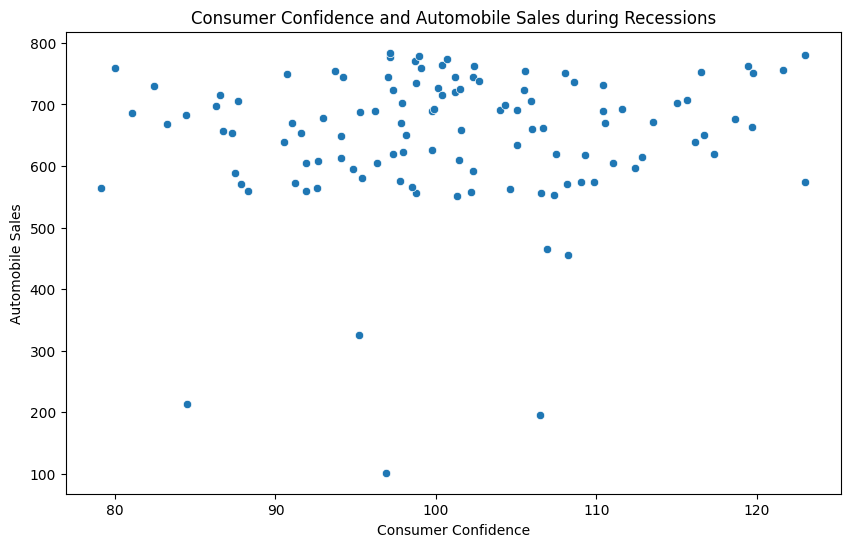

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df["Recession"]==1], x='Consumer_Confidence', y='Automobile_Sales')
plt.title("Consumer Confidence and Automobile Sales during Recessions")
plt.xlabel("Consumer Confidence")
plt.ylabel("Automobile Sales")
plt.show()

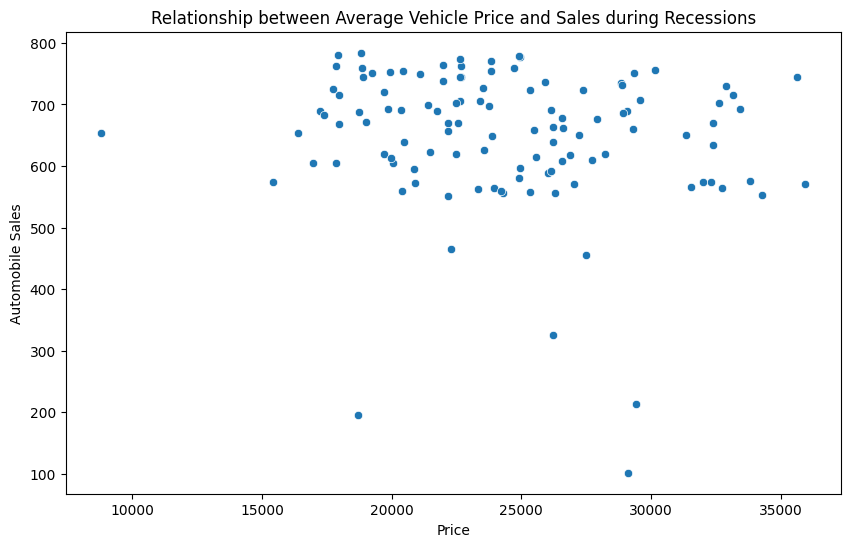

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df["Recession"]==1], x='Price', y='Automobile_Sales')
plt.title("Relationship between Average Vehicle Price and Sales during Recessions")
plt.xlabel("Price")
plt.ylabel("Automobile Sales")
plt.show()

## **TASK 1.7**

Display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

No Recession    0.790129
Recession       0.209871
Name: Advertising_Expenditure, dtype: float64

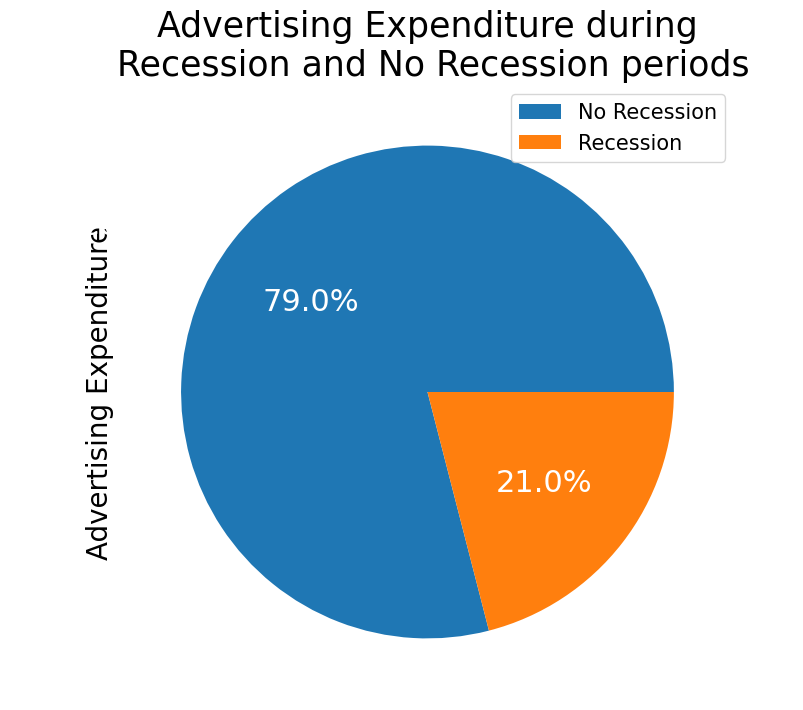

In [44]:
temp=df.groupby("Recession")["Advertising_Expenditure"].sum()/df["Advertising_Expenditure"].sum()
temp.index=["No Recession", "Recession"]
display(temp)
temp.plot(kind="pie",
          figsize=(12, 8),
          y="Advertising_Expenditure",
          x="Recession",
          autopct='%1.1f%%',
          textprops={'color':"w", "size":22},
         )
plt.ylabel(ylabel="Advertising Expenditure",fontsize=20)
plt.title(label="Advertising Expenditure during\n Recession and No Recession periods",fontsize=25)
plt.legend(fontsize=15)
plt.show()

## **TASK 1.8**

Display the total Advertisement expenditure for each vehicle type during recession period

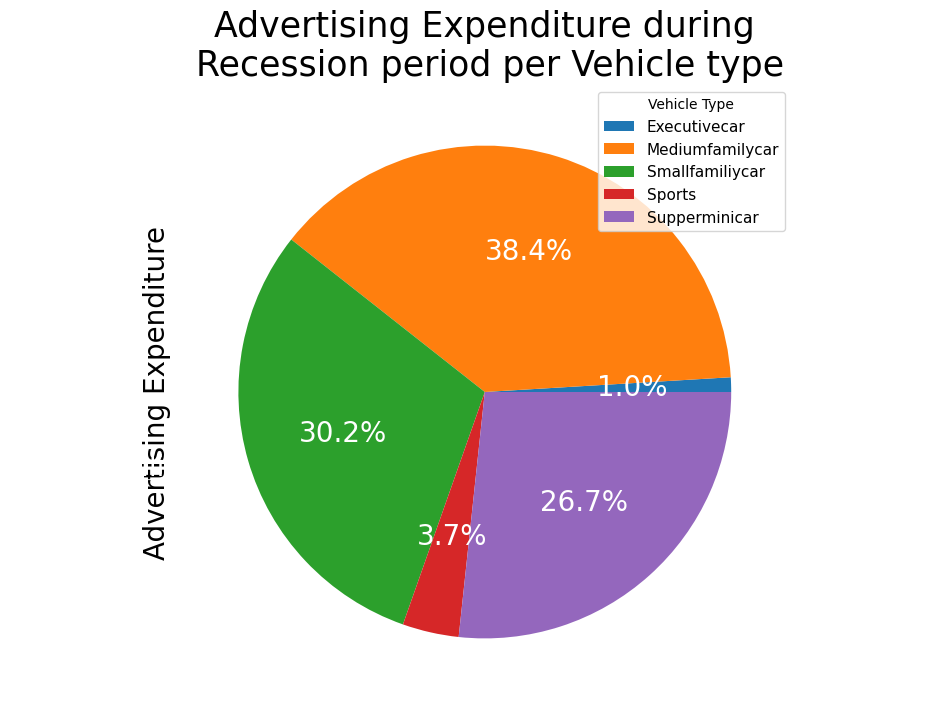

In [45]:
temp=df[df["Recession"]==1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
temp.plot(kind="pie",
          figsize=(12, 8),
          autopct='%1.1f%%',
          y="Advertising_Expenditure",
          textprops={'color':"w", "size":20},
         )
plt.ylabel(ylabel="Advertising Expenditure",fontsize=20)
plt.title(label="Advertising Expenditure during\n Recession period per Vehicle type",fontsize=25)
plt.legend(title="Vehicle Type", loc="best", fontsize=11)
plt.show()

## **TASK 1.9**

analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period

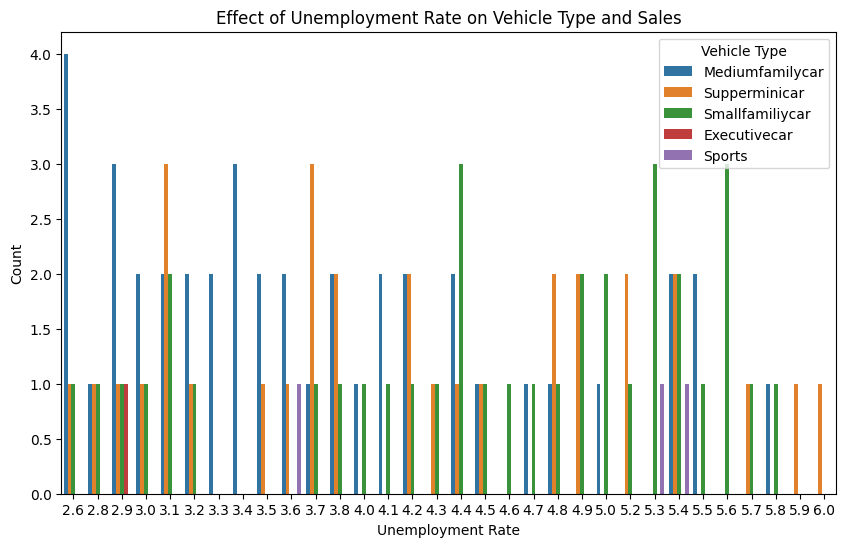

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df["Recession"]==1], x="unemployment_rate", hue="Vehicle_Type")
plt.xlabel("Unemployment Rate")
plt.ylabel("Count")
plt.title("Effect of Unemployment Rate on Vehicle Type and Sales")
plt.legend(loc="upper right", title="Vehicle Type")


In [47]:


!pip install dash --upgrade
!pip install Werkzeug --upgrade
!pip install jupyter_dash
!pip install --upgrade plotly


import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')
# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard


#---------------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]
# List of years
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1
    html.H1("Automobile Sales Statistics Dashboard",
                                style={'textAlign':'left',
                                        'color':'#503D36',
                                        'font-size':24}),
    html.Div([#TASK 2.2
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Select Statistics',
            placeholder='Select a report type'
        )
    ]),
   html.Div(dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value='select-year'
        )),
    html.Div([#TASK 2.3
    html.Div(id='output-container', className='chart-grid', style={'display':'flex'}),])
])
#TASK 2.4
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics',component_property='value'))

def update_input_container(selected_statistics):
    if selected_statistics =='Yearly Statistics':
        return False
    else:
        return True


@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'), Input(component_id='select-year', component_property='value')])


def update_output_container(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]

#TASK 2.5: Create and display graphs for Recession Report Statistics


        yearly_rec=recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec,
                x='Year',
                y='Automobile_Sales',
                title="Average Automobile Sales fluctuation over Recession Period"))


        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2  = dcc.Graph(figure=px.bar(average_sales, x= 'Vehicle_Type', y= 'Automobile_Sales',
                title='Average Number of Vehicles Sold by Type'))


        exp_rec= recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
                    figure=px.pie(exp_rec,
                    values='Advertising_Expenditure',
                 names='Vehicle_Type',
                 title="Total Expenditure by Vehicle Type"
                ))


        unempl = recession_data.groupby(['Vehicle_Type', 'unemployment_rate'])['Automobile_Sales'].mean().reset_index()
        print(unempl.columns)
        R_chart4 = dcc.Graph(
                    figure=px.bar(unempl,
                    x='Vehicle_Type',
                    y='Automobile_Sales',
                    color='unemployment_rate',
                    title='Effect of Unemployment Rate on Vehicle Type and Sales'
                    ))


        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1),html.Div(children=R_chart2)],style={'display':'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3),html.Div(children=R_chart4)],style={'display':'flex'})
            ]

# TASK 2.6
    elif (input_year and selected_statistics=='Yearly Statistics') :
        yearly_data = data[data['Year'] == input_year]

#TASK 2.5


        yas= data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(figure=px.line(yas, x='Year', y='Automobile_Sales'))


        monthly_sales = data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(figure=px.line(monthly_sales, x= 'Month', y='Automobile_Sales',
            title= 'Total Monthly Automobile Sales'))


        avr_vdata=yearly_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph( figure =px.bar(avr_vdata,x='Year', y='Automobile_Sales',title='Average Vehicles Sold by Vehicle Type in the year {}'.format(input_year)))


        exp_data=yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(figure=px.pie(exp_data, values = 'Advertising_Expenditure', names='Vehicle_Type'))

#TASK 2.6
        return [
            html.Div(className='chart-item', children=[html.Div(children=Y_chart1),html.Div(children=Y_chart2)],style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=Y_chart3),html.Div(children=Y_chart4)],style={'display': 'flex'})
            ]

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>